# 4.7 Comparison of distributions

We often ask whether two samples are drawn from the same distribution or, equivalently, whether two sets of measurements imply a difference in the measured quantity. Similarly, we can ask whether a sample is consistent with being drawn from some known distribution.

First, what do we mean by the same distribution? We can describe distributions by their shape, location, and scale. Once we can assume the shape, or likewise once we know from which distribution the sample is drawn (i.e., a Gaussian distribution), the problem simplifies; we now only need to consider two parameters: location and scale. 

We can implement different statistical tests depending on the data type (discrete vs. continuous random variables), the assumptions we can make about the underlying distributions and the specific question we ask. 


The underlying idea of statistical tests is to use data to compute an appropriate statistic and then compare the resulting data-based value to its expected distribution. As discussed in the preceding section, the expected distribution is evaluated by assuming that the null hypothesis is true. When this expected distribution implies that the data-based value is unlikely to have arisen from it by chance (i.e., a small $p$ value), the null hypothesis is **rejected** with some threshold probability $\alpha$, typically $0.05$ or $0.01$ ( $p < \alpha$). 
- For example, if the null hypothesis is that our datum came from the $\mathcal{N}(0,1)$ distribution, the $x=3$ corresponds to $p=0.003$. Note: $p>a$ does not mean the hypothesis is proven correct.

## 4.7.1 Regression towards the mean

Before proceeding with statistical tests for comparing distributions, we point out a simple statistical selection effect that is sometimes ignored and leads to invalid conclusions. 

If two instances of a data set ${x_i}$ are drawn from some distribution, the mean difference between the matched values (i.e., the $i$th values from both data sets) will be zero. However, the mean difference can become biased if we use one data set and select a subsample for comparison. For example, if we choose the lowest quartile from the 1st data set, the mean difference between the 2nd and 1st data set will be larger than zero.

This effect is known as regression toward the mean: if a random variable is extreme on its first measurement, it will tend to be closer to the population mean on a second measurement.

- **Example**: In an astronomical context, a commonly related tale states that weather conditions observed at a telescope site today are, typically, not as good as those that would have been inferred from the prior measurements made during the site selection process. 

Thus, when selecting a subsample for further study or a control sample for comparison analysis, one has to worry about various statistical selection effects.

## 4.7.2 Nonparametric methods for comparing distributions

When the distributions are not known, tests are called *nonparametric*, or distribution-free tests. The most popular nonparametric test is the **Kolmogorov-Smirnov (K-S) test**, which compares the cumulative distribution function, $F(x)$, for two samples, $\{x1_i\}$, $i = 1,...,N_1$, and $\{x2_i\}$, $i = 1,...,N_2$.

The K-S test and its variations can be performed in Python using the routines `kstest`, `ks_2samp`, and `ksone` from the module `scipy.stats`. In the example below, we will draw from a (**EXPLAIN**)

In [10]:
import numpy as np
from scipy import stats
np.random.seed(0)
vals = np.random.normal(loc=0, scale=1, size=1000)
stats.kstest(vals, "norm")

KstestResult(statistic=0.03737519429804048, pvalue=0.11930823166569182)

The K-S test is based on the following statistic, which measures the maximum distance of the two cumulative distributions, $F_1(x1)$ and $F_2(x2)$,

$$D = \text{max}|F_1(x1) = F_2(x2)| $$

where $0 \leq D \leq 1$. The key question is how often would the value of $D$ computed from the data arise by chance if the two samples were drawn from the *same* distribution (the null hypothesis in this case). Surprisingly, this question has a well-defined answer even when we know nothing about the underlying distribution. Kolmogorov showed in 1933 that the probability of obtaining by chance a value of $D$ larger than the measured value is given by the function 

$$\qquad \qquad \qquad Q_{KS}(\lambda) = 2\sum^{\infty}_{k=1} (-1)^{k-1}e^{-2k^2\lambda^2} \qquad\qquad\qquad (1)$$

where the argument $\lambda$ can be accurately described by the following approximation:

$$\lambda = \bigg(0.12 + \sqrt{n_e} + \frac{0.11}{\sqrt{n_e}}\bigg)D $$

where the number of effective data points is computed from

$$n_e = \frac{N_1N_2}{N_1 +N_2}. $$

Note that for large $n_e$, $\lambda \approx \sqrt{n_e}D$. If the probability that a given value of $D$ is due to chance is very small (e.g., 0.01 or 0.05), we can reject the null hypothesis that the two samples were drawn from the same underlying distribution.

For $n_e$ greater than about 10 or so, we can bypass $\text{eq}\:(1)$ and use the following approximation to evaluate $D$ corresponding to a given probability $\alpha$ of obtaining a value at least that large:

$$D_{KS} = \frac{C(\alpha)}{\sqrt{n_e}} $$,

where $C(\alpha = 0.05)= 1.36$ and $C(\alpha = 0.01)= 1.63$. Note that the ability to reject the null hypothesis (if it really is false) increases with $\sqrt{n_e}$. 

- **Example**: if $n_e$ = 100, then $D> D_{KS}$ = 0.163 would arise by chance in only 1% of all trials. If the actual data-based value is indeed 0.163, we can reject the null hypothesis that the data were drawn from the same (unknown) distribution, with our decision being correct 99 out of 100 cases.

We can also use the K-S test to ask, "Is the measured $f(x)$ consistent with a known reference distribution function $h(x)$?" This is known as the "one sample" K-S test, as opposed to the "two sample" K-S test discussed above. In this case, $N_1 = N$ and $N_2 = \infty$, and thus $n_e = N$. Again, a small value of $Q_{KS}$ (or $D > D_{KS}$) indicates that it is unlikely, at the given confidence level set by $\alpha$, that the data summarized by $f(x)$ were drawn from $h(x)$.

The K-S test is sensitive to the underlying distribution's location, scale, and shape. Additionally, because the test relies on cumulative distributions, it is invariant to the reparametrization of $x$ (we would get the same answer if we used $\ln{x}$ instead of $x$). The K-S test's main strength (but also its main weakness) is its ignorance about the underlying distribution. For example, the test is insensitive to details in the differential distribution function (e.g., narrow regions where it drops to zero) and more sensitive near the center distribution than at the tails. The K-S test is not the best choice for distinguishing samples drawn from Gaussian and exponential distributions (see 4.7.4).

A simple test related to the K-S test was developed by Kuiper to treat distributions defined on a circle. It is based on the statistic

$$D* = \text{max}\{F_1(x1)-F_2(x2)\} + \text{max}\{F_2(x1)-F_1(x2)\}. $$

This statistic considers both positive and negative difference between two distributions ($D$ from the K-S test is equal to the greater of the two terms). For distributions defined on a circle (i.e., $0^\circ < x < 360^\circ$), the value of $D*$ is invariant to where exactly the origin ($x=0^\circ$) is placed. Thus, the Kuiper test is a good test for comparing the longitude distributions of two astronomical samples. By analogy with the K-S test,

$$Q_{\text{Kuiper}}(\lambda) = 2\sum^{\infty}_{k=1}(4k^2\lambda^2-1)e^{-2k^2\lambda^2} $$

with

$$\lambda = \bigg(0.155 + \sqrt{n_e} +\frac{0.24}{\sqrt{n_e}}\bigg) D*$$.

The K-S test is not the only option for nonparametric comparison of distributions. The Cramér-von Mises criterion, the Watson test, and the Anderson-Darling test are similar to the K-S test but consider somewhat different statistics. For example, the Anderson-Darling test is more sensitive to difference in the tails of the two distributions than the K-S test. A difficulty with these other statistics is that a simple summary of their behavior, such as given by $\text{eq}\: (1)$ for the K-S test, is not readily available. 

The **Gini coefficient** is a somewhat similar quantity that is also based on the cumulative distribution function. It measures the deviation of a given cumulative distribution ($F(x)$ defined as $x_\text{min} \leq x \leq x_\text{max}$) from that expected uniform distribution:

$$ G = 1-2\int^{x_\text{max}}_{x_\text{min}}F(x)dx.$$

When $F(x)$ corresponds to a uniform differential distribution $G=0$ and $G \leq 1$ always. The Gini coefficient is not a statistical test, but we mention it here for reference because it is commonly used for classification in economics and related fields.

### *The U test and the Wilcoxon test*

The K-S test, as well as other nonparametric methods for comparing distributions, are often sensitive to more than one distribution property, such as the location or scale parameters. We often care about differences in only a particular statistic, such as the mean value, and do not care about the others. For these cases, there exist several nonparametric tests analogous to the better-known classical parametric tests: the $t$ test and the paired $t$ test. These are based on the ranks of data points and not their values.

The **$U$ test**, or the Mann-Whitney-Wilcoxon test (or the Wilcoxon rank-sum test), is a nonparametric test for testing whether two data sets are drawn from distributions with different location parameters (if the distributions are known to be Gaussian, the standard classical test is called the $t$ test). The sensitivity of the $U$ test is dominated by a difference in the medians of the two tested distributions.

The **$U$ statistic** is determined using ranks for the full sample obtained by concatenating the two data sets and sorting them while retaining the information about which data set a value came from. To compute the $U$ statistic, take each value from sample 1 and count the number of observations in sample 2 that have a smaller rank (in the case of identical values, take half a count). The sum of these counts is $U$, and the minimum of the values with the samples reversed is used to assess the significance. For cases with more than about 20 points per sample, the $U$ statistic for sample 1 can be more easily computed as 

$$U_1 = R_1 - \frac{N_1(N_1-1)}{2} $$

where $R_1$ is the sum of ranks for sample 1 and analogously for sample 2. The adopted $U$ statistic is the smaller of the two (note that $U_1+U_2 = N_1N_2$, which can be used to check computations). The behavior for $U$ for large samples can be well approximated with a Gaussian distribution, $\mathcal{N}(\mu_U,\sigma_U)$, of the variable

$$z = \frac{U-\mu_U}{\sigma_U} $$

with 

$$\mu_U = \frac{N_1N_2}{2} $$

and 

$$\sigma_U = \sqrt{\frac{N_1N_2(N_1+N_2+1)}{12}}. $$

A particular case of comparing the means of two data sets is when the data sets have the same size  ($N_1 = N_2 = N$), and data points are paired. For example, the two data sets could correspond to the same sample measured twice, before and after something that could have affected the values, and we are testing for evidence of a change in means values. The nonparametric **Wilcoxon signed-rank test** can be used to compare the means of two arbitrary distributions. The test is based on differences $y_i=x1_i-x2_i$, and the values with $y_1=0$ are excluded, yielding the new sample size $m < N$. The sample is ordered by $|y_i|$, resulting in the rank $R_i$ for each pair, and each pair is assigned $\Phi = 1$ if $x1_i > x2_i$ and 0 otherwise. The Wilcoxon signed-ranked statistic is then

$$W_+ = \sum^m_i \Phi_iR_i $$

that is, all the ranks with $y_i > 0$ are summed. Analogously, $W_{-}$ is the sum of all the ranks with $y_i < 0$, and the statistic $T$ is the smaller of the two. For small values of $m$, the significance of $T$ can be found in tables. For $m$ larger than about 20, the behavior of $T$ can be well approximated with a Gaussian distribution. $\mathcal{N} (\mu_T, \sigma_T)$, of the variable

$$z = \frac{T-\mu_T}{\sigma_T} $$

with 

$$\mu_T = \frac{N(2N+1)}{2} $$

and

$$\sigma_T = N \sqrt{\frac{(2N+1)}{12}}. $$

The Wilcoxon signed-rank test can be performed with the function `scipy.stats.wilcoxon`:

The U test and Wilcoxon test are implemented in `mannwhitneyu` and `ranksums` (i.e., Wilcoxon rank-sum test) within the `scipy.stats module`:

In [12]:
import numpy as np
from scipy import stats
x, y = np.random.normal(0, 1, size=(2, 1000))
T, p = stats.wilcoxon(x, y)

In [13]:
import numpy as np
from scipy import stats
np.random.seed(0)
x, y = np.random.normal(0, 1, size=(2, 1000))
stats.mannwhitneyu(x, y, alternative='less')

MannwhitneyuResult(statistic=482654.0, pvalue=0.08959699352821504)

## 4.7.3 Comparison of two-dimensional distributions

For multidimensional distribution, the cumulative probability distribution is not well defined in more than one dimension. Thus, there *does not exist* a direct analog to the K-S test for distributions that are multidimensional. However, we can use a similar method developed by Fasano and Franceschini, which goes as follows:

- Assume we have two sets of data points, $\{x_i^A, y_i^A\}$, $i = 1,...,N_A$ and $\{x_i^B, y_i^B\}$, $i = 1,...,N_B$. Define four quadrants centered on the point $\{x_j^A, y_j^A\}$.


- Compute the number of data points from each data set in each quadrant.


- Record the maximum difference among the four quadrants between the fractions for data sets $A$ and $B$.


- Repeat for all data points from sample $A$ to get the overall maximum difference, $D_A$, and repeat the same process for sample $B$. The final statistic is then $D = (D_A+D_B)/2$

Note that although it isn't necessarily true that the distribution of $D$ is independent of the details of the underlying distributions, Fasano and Franceschini showed that its variation is captured well by the coefficient of correlation, $\rho$. Using simulated samples, they derived the following behavior analogous to the one-dimensional K-S Test:

$$\lambda = \frac{\sqrt{n_e}D}{1+(0.25-0.75/\sqrt{n_e})\sqrt{1-\rho^2}}$$

This value of $\lambda$ can be used with $\text{eq}\:(1)$ to compute the significance level of $D$ when $n_e >20$.

## 4.7.4 Is my distribution really Gaussian?

When asking, "Is the measured $f(x)$ consistent with a known reference distribution $h(x)$?", a few standard statistical tests can be used when we know or can assume that both $h(x)$ and $f(x)$ are Gaussian distributions. We thus need to first reliably prove that our data is, in fact, consistent with being a Gaussian.

Assume we have a data set $\{x_i\}$; we want to know if we can reject the null hypothesis that $\{x_i\}$ was drawn from a Gaussian distribution. We aren't concerned with scale and location parameters at the moment but only whether the *shape* of the distribution is Gaussian. Common reasons for deviations from a Gaussian are nonzero skewness, nonzero kurtosis, or a complex combination of deviations. Numerous tests are available in statistical literature which have varying sensitivity to different deviations. 

- **Example**: The difference between the mean and median for a given data set is sensitive to nonzero skewness but has no sensitivity whatsoever to changes in kurtosis. Therefore, if one is trying to detect a difference between the Gaussian $\mathcal{N}(\mu = 4, \sigma = 2)$ and the Poisson distribution with $\mu=4$, the difference between the mean and the median might be a good test (0 vs. 1/6 for large samples), but it will not catch the difference between a Gaussian and an exponential distribution no matter what the size of the sample.

A common feature of most tests is to predict the distribution of their chosen statistic under the assumption that the null hypothesis is true. An added complexity is whether the test uses any parameter estimates derived from data. 

The first test we'll discuss is the **Anderson-Darling test**, specialized to the case of a Gaussian distribution. The test is based on the statistic 

$$ A^2 = -N - \frac{1}{N}\sum^N_{i=1}[(2i-1)\ln(F_i)+(2N-2i+1)\ln(1-F_i)] $$

where $F_i$ is the $i$th value of the cumulative distribution function $z_i$, which is defined as 

$$z_i = \frac{x_i-\mu}{\sigma}$$

and assumed to be in ascending order. In this expression, either one or both of $\mu$ and $\sigma$ can be known or determined from data $\{x_i\}$. Depending on which parameters are determined from data, the statistical behavior of $A^2$ varies. Furthermore, if **both** $\mu$ and $\sigma$ are determined from data, then $A^2$ needs to be multiplied by $(1+4/N-25/N^2)$. The specialization to a Gaussian distribution enters when predicting the detailed statistical behavior of $A^2$, and its values for a few common significance levels $(p)$ are listed in Table $4.1$. The values corresponding to other significance levels as well as the statistical behavior of $A^2$ in the case of distributions other than Gaussian can be computed with simple numerical simulations.

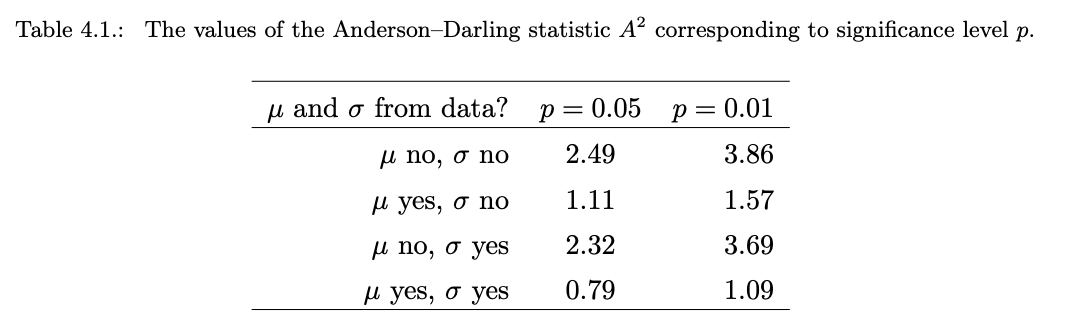

#### Python Implementation of the Anderson-Darling test

`scipy.stats.anderson` implements the Anderson–Darling test:

In [14]:
import numpy as np
from scipy import stats
np.random.seed(0)
x = np.random.normal(0, 1, size=1000)
A, crit, sig = stats.anderson(x, 'norm')
A

0.2432179174634257

The K-S test can also be used to detect a difference between $f(x)$ and $\mathcal{N}(\mu,\sigma)$. A difficulty arises if $\mu$ and $\sigma$ are determined from the same data set: in this case, the behavior of $Q_{KS}$ is different from that given by $\text{eq}\:(1)$ and has only been determined using Monte Carlo simulations.

Another test for detecting non-Gaussianity in $\{x_i\}$ is the **Shapiro-Wilk test**. It is implemented in a number of statistical programs and based on both data values $x_i$ and data ranks $R_i$:

$$W = \frac{\big(\sum^N_{i=1}a_iR_i\big)^2}{\sum^N_{i=1}(x_i-\overline{x})^2} $$

where constants $a_i$ encode the expected values of the order statistics for random variables sampled from the standard normal distribution (the test's null hypothesis), The Shapiro-Wilk test is very sensitive to non-Gaussian tails of the distribution ("outliers"), but not as much to detailed departures from Gaussianity in the distribution's core.

#### Python Implementation of the Shapiro–Wilk test
The Shapiro–Wilk test is implemented in `scipy.stats.shapiro`. A value of $W$ close to 1 indicates that the data is indeed Gaussian. For more information, see the documentation of the function `shapiro`.

In [16]:
import numpy as np
from scipy import stats
np.random.seed(0)
x = np.random.normal(0, 1, 1000)
stats.shapiro(x)

ShapiroResult(statistic=0.9985557794570923, pvalue=0.5914123058319092)

Often the biggest deviation from Gaussianity is due to so-called "catastrophic outliers," or largely discrepant values many $\sigma$ away from $\mu$. 

- **Example**: the overwhelming majority of measurements of fluxes of objects in an astronomical image many follow a Gaussian distribution. However, for just a few of them, unrecognized cosmic rays could have had a significant impact on flux extraction. 

A simple method to detect the presence of such outliers is to compare the sample standard deviation, $s$, and $\sigma_G$, recalling that $s$ is equal to

$$ s = \sqrt{\frac{1}{N-1}\sum^N_{i=1}(x_i-\overline{x})^2} $$

and $\sigma_G$ is equal to

$$ \sigma_G = 0.7413(q_{75} - q_{25}). $$

Even when the outlier fraction is tiny, the ratio $s/\sigma_G$ can become significantly large. When $N > 100$, for a Gaussian distribution (i.e., for the null hypothesis), this ratio follows a nearly Gaussian distribution with $\mu \sim 1$ and with $\sigma \sim 0.92/\sqrt{N}$.

- **Example**: if you measure $s/\sigma_G = 1.3$ using a sample with $N=100$, then you can state that the probability of such a large value appearing by chance is less than 1% and reject the null hypothesis that your sample was drawn from a Gaussian distribution. 

Another useful result is that the difference of the mean and the median drawn from a Gaussian distribution also follows a nearly Gaussian distribution with $\mu \sim 0$ and $\sigma \sim 0.76s/\sqrt{N}$. Therefore, when $N>100$, we can define two simple statistics based on the measured values of  ($\mu,q_{50},s, \text{and}\:\sigma_G$) that both measure departures in terms of Gaussian-like "sigma":

$$Z_1 = 1.3\frac{|\mu-q_{50}|}{s}\sqrt{N}$$

and 

$$Z_2= 1.1\bigg|\frac{s}{\sigma_G}-1\bigg|\sqrt{N}$$.

Similar results for the statistical behavior of various statistics can be easily derived using Monte Carlo samples.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


______________________________________________________________________
  Kolmogorov-Smirnov test: D = 0.0076  p = 0.6
  Anderson-Darling test: A^2 = 0.29
    significance  | critical value 
    --------------|----------------
    0.58          | 15.0%
    0.66          | 10.0%
    0.79          | 5.0%
    0.92          | 2.5%
    1.09          | 1.0%
  Shapiro-Wilk test: W = 1 p = 0.59
  Z_1 = 0.2
  Z_2 = 1.0
______________________________________________________________________
  Kolmogorov-Smirnov test: D = 0.28  p = 0
  Anderson-Darling test: A^2 = 1.9e+02
    significance  | critical value 
    --------------|----------------
    0.58          | 15.0%
    0.66          | 10.0%
    0.79          | 5.0%
    0.92          | 2.5%
    1.09          | 1.0%
  Shapiro-Wilk test: W = 0.94 p = 0
  Z_1 = 32.2
  Z_2 = 2.5


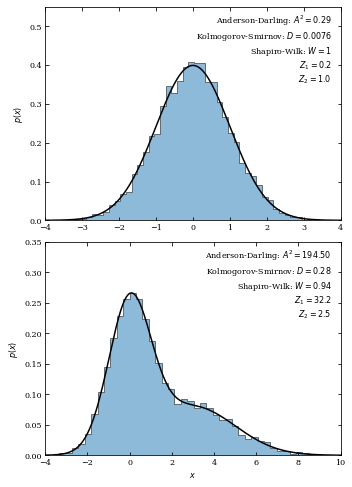

In [19]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

from __future__ import print_function, division
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from astroML.stats import mean_sigma, median_sigmaG

# create some distributions
np.random.seed(1)
normal_vals = stats.norm(loc=0, scale=1).rvs(10000)
dual_vals = stats.norm(0, 1).rvs(10000)
dual_vals[:4000] = stats.norm(loc=3, scale=2).rvs(4000)

x = np.linspace(-4, 10, 1000)
normal_pdf = stats.norm(0, 1).pdf(x)
dual_pdf = 0.6 * stats.norm(0, 1).pdf(x) + 0.4 * stats.norm(3, 2).pdf(x)

vals = [normal_vals, dual_vals]
pdf = [normal_pdf, dual_pdf]
xlims = [(-4, 4), (-4, 10)]


#------------------------------------------------------------
# Compute the statistics and plot the results
fig = plt.figure(figsize=(5, 7))
fig.subplots_adjust(left=0.13, right=0.95,
                    bottom=0.06, top=0.95,
                    hspace=0.1)

for i in range(2):
    ax = fig.add_subplot(2, 1, 1 + i)  # 2 x 1 subplot

    # compute some statistics
    A2, sig, crit = stats.anderson(vals[i])
    D, pD = stats.kstest(vals[i], "norm")
    W, pW = stats.shapiro(vals[i])

    mu, sigma = mean_sigma(vals[i], ddof=1)
    median, sigmaG = median_sigmaG(vals[i])

    N = len(vals[i])
    Z1 = 1.3 * abs(mu - median) / sigma * np.sqrt(N)
    Z2 = 1.1 * abs(sigma / sigmaG - 1) * np.sqrt(N)

    print(70 * '_')
    print("  Kolmogorov-Smirnov test: D = %.2g  p = %.2g" % (D, pD))
    print("  Anderson-Darling test: A^2 = %.2g" % A2)
    print("    significance  | critical value ")
    print("    --------------|----------------")
    for j in range(len(sig)):
        print("    {0:.2f}          | {1:.1f}%".format(sig[j], crit[j]))
    print("  Shapiro-Wilk test: W = %.2g p = %.2g" % (W, pW))
    print("  Z_1 = %.1f" % Z1)
    print("  Z_2 = %.1f" % Z2)

    # plot a histogram
    ax.hist(vals[i], bins=50, density=True, histtype='stepfilled', alpha=0.5)
    ax.plot(x, pdf[i], '-k')
    ax.set_xlim(xlims[i])

    # print information on the plot
    info = "Anderson-Darling: $A^2 = %.2f$\n" % A2
    info += "Kolmogorov-Smirnov: $D = %.2g$\n" % D
    info += "Shapiro-Wilk: $W = %.2g$\n" % W
    info += "$Z_1 = %.1f$\n$Z_2 = %.1f$" % (Z1, Z2)
    ax.text(0.97, 0.97, info,
            ha='right', va='top', transform=ax.transAxes)

    if i == 0:
        ax.set_ylim(0, 0.55)
    else:
        ax.set_ylim(0, 0.35)
        ax.set_xlabel('$x$')

    ax.set_ylabel('$p(x)$')

plt.show()

Figure 4.7 shows the results of these tests when applied to samples of $N = 10, 000$ values selected from a Gaussian distribution and from a mixture of two Gaussian distributions. To summarize, for data that depart from a Gaussian distribution, we expect the Anderson–Darling $A^2$ statistic to be much larger than 1 (see table 4.1), the K-S $D$ statistic (see eq. 4.48 and 4.52) to be much larger than $1/\sqrt{N}$, the Shapiro–Wilk W statistic to be smaller than 1, and $Z_1$ and $Z_2$ to be larger than several $\sigma$. All these tests correctly identify the first data set as being normally distributed, and the second data set as departing from normality.

In cases when our empirical distribution fails the tests for Gaussianity, but there is no strong motivation for choosing an alternative specific distribution, a good approach for modeling non- Gaussianity is to adopt the Gram–Charlier series,

$$h(x) = \mathcal{N}(\mu,\sigma)\sum^\infty_{k=0}a_kH_k(z) $$

where $z = (x-\mu)/\sigma$ and $H_k(z)$ are the Hermite polynomials ($H_0 = 1, H_1 = z, H_2 = z^2-1, H_3 = z^3 - 3z, \text{etc.}$). For “nearly Gaussian” distributions, even the first few terms of the series provide a good description of $h(x)$ (see figure 3.6 for an example of using the Gram–Charlier series to generate a skewed distribution). A related expansion, the Edgeworth series, uses derivatives of $h(x)$ to derive “correction” factors for a Gaussian distribution.

## 4.7.5. Is my distribution bimodal?

It happens frequently in practice that we want to test a hypothesis that the data were drawn from a unimodal distribution (e.g., in the context of studying bimodal color distribution of galaxies, bimodal distribution of radio emission from quasars, or the kinematic structure of the Galaxy’s halo). Answering this question can become quite involved and we discuss it in chapter 5 (see §5.7.3).

## 4.7.6 Parametric methods for comparing distributions

Given a sample $\{x_i\}$ that does not fail any test for Gaussianity, one can use a few standard statistical tests for comparing means and variances. They are more efficient (they require smaller samples to reject the null hypothesis) than nonparametric tests, but often by much less than a factor of 2. For good nonparametric tests close to 1 (e.g., the efficiency of the U test compared to the t test described below is as high as 0.95). Hence nonparametric tests are generally the preferable option to classical tests which assume Gaussian distributions. Nevertheless, because of their ubiquitous presence in practice and literature, we briefly summarize the two most important classical tests. As before, we assume that we are given two samples, $\{x1_i\}$, which $i=1,...,N_1$ and $\{x2_i\}$ with $i = 1,...,N_2$

### Comparison of Gaussian means using the t test

If the only question we are asking is whether our data $\{x1i\}$ and $\{x2i\}$ were drawn from two Gaussian distributions with a different $\mu$ but the same $\sigma$, and we were given $\sigma$, the answer would be simple. We would first compute the mean values for both samples, $\overline{x1}$ and $\overline{x2}$, using (eq 3.31) and their standard errors, $\sigma_{\overline{x1}} = \sigma/\sqrt{N_1}$ and analogously for $\sigma_\overline{x2}$, and then ask how large is the difference $\Delta = \overline{x1}-\overline{x2}$ in terms of its expected scatter, $\sigma_\Delta = \sigma\sqrt{1/N_1^2+1/N_2^2}$: $M_\sigma = \Delta/ \sigma_\Delta$. The probability that the observed value of $M$ would arise by chance is given by the Gauss error function as $p = 1-\text{erf}(M/\sqrt{2})$. For example, for $M = 3, p = 0.003$

If we do *not* know $\sigma$, but need to estimate it from data (with possibly different values for the two sample, $s_1$ and $s_2$, the the ratio $M_s = \Delta/s_\Delta$, where $s_\Delta = \sqrt{s_1^2/N_1 + s_2^2/N_2}$, can no longer be described by a Gaussian distribution! Instead it follows Student t's distribution. The number of degrees of freedom depends on whether we assume that the two underlying distributions from which the samples were drawn have the same variances or not. If we can make this assumption then the relevant statistic (corresponding to $M_s$) is 

$$t=\frac{\overline{x1}-\overline{x2}}{s_D}$$

where

$$s_D = \sqrt{s^2_{12}\bigg(\frac{1}{N_1}+\frac{1}{N_2}\bigg)}$$

is an estimate of the standard error of the difference of the means, and

$$s_{12} = \sqrt{\frac{(N_1-1)s^2_1+(N_2-1)s^2_2}{N_1+N_2-2}} $$

is an estimator of the common standard deviation of the two samples. The number of degrees of freedom is $k = (N_1+N_2-2)$. Hence, instead of looking up the significance of $M_\sigma = \Delta/\sigma_\Delta$ using the Gaussian distribution $\mathcal{N}(0,1)$, we use the significance corresponding to t and Student's t distribution with $k$ degrees of freedom. For very large samples, this procedure tends to the simple case with known $\sigma$ described in the first paragraph because Student’s t distribution tends to a Gaussian distribution (in other words, $s$ converges to $\sigma$).

If we cannot assume that the two underlying distributions from which the samples were drawn have the same variances, then the appropriate test is called Welch’s t test and the number of degrees of freedom is determined using the Welch–Satterthwaite equation (however, see §5.6.1 for the Bayesian approach). For formulas and implementation, see NumRec.

A special case of comparing the means of two data sets is when the data sets have the same size (N1 =N2 =N)andeachpairofdatapointshasthesameσ,butthevalueofσisnotthesame for all pairs (recall the difference between the nonparametric U and the Wilcoxon tests). In this case, the t test for paired samples should be used. The expression 4.72 is still valid, but eq. 4.73 needs to be modified as

$$s_D = \sqrt{\frac{(N_1-1)s^2_1+(N_2-1)s^2_2-2\text{Cov}_{12}}{N}} $$

where the covariance between the two samples is

$$\text{Cov}_{12} = \frac{1}{N-1}\sum^N_{i=1}(x1_i-\overline{x1})(x2_i-\overline{x2}) $$

Here the pairs of data points from the two samples need to be properly arranged when summing, and the number of degrees of freedom is $N-1$.

### Comparison of Gaussian variances using the F test


The F test is used to compare the variances of two samples, {x1i} and {x2i}, drawn from two unspecified Gaussian distributions. The null hypothesis is that the variances of two samples are equal, and the statistic is based on the ratio of the sample variances (see eq. 3.32),Comparison of Gaussian variances using the F test

$$F = \frac{s^2_1}{s^2_2} $$

where F follows Fisher’s F distribution with d1 = N1 − 1 and d2 = N2 − 1 (see §3.3.9). Situations when we are interested in only knowing whether σ1 < σ2 or σ2 < σ1 are treated by appropriately using the left and right tails of Fisher’s F distribution.

We will conclude this section by quoting Wall and Jenkins: “The application of efficient statistical procedure has power; but the application of common sense has more.” We will see in the next chapter that the Bayesian approach provides a transparent mathematical framework for quantifying our common sense.
